In [3]:
%%javascript
/**********************************************************************************************
Known Mathjax Issue with Chrome - a rounding issue adds a border to the right of mathjax markup
https://github.com/mathjax/MathJax/issues/1300
A quick hack to fix this based on stackoverflow discussions: 
http://stackoverflow.com/questions/34277967/chrome-rendering-mathjax-equations-with-a-trailing-vertical-line
**********************************************************************************************/

$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

# MIDS - w261 Machine Learning At Scale
__Course Lead:__ Dr James G. Shanahan (__email__ Jimi via  James.Shanahan _AT_ gmail.com)

## Assignment - HW4


---
__Name:__  *Your Name Goes Here*   
__Class:__ MIDS w261 (Section *Your Section Goes Here*, e.g., Fall 2016 Group 1)     
__Email:__  *Your UC Berkeley Email Goes Here*@iSchool.Berkeley.edu     
__StudentId__  123457    __End of StudentId__     
__Week:__   4

__NOTE:__ please replace `1234567` with your student id above      
__Due Time:__ HW is due the Tuesday of the following week by 8AM (West coast time). I.e., Tuesday, Feb 7, 2017 in the case of this homework. 

# Table of Contents <a name="TOC"></a> 

1.  [HW Intructions](#1)   
2.  [HW References](#2)
3.  [HW Problems](#3)   
1.  [HW Introduction](#1)   
2.  [HW References](#2)
3.  [HW  Problems](#3)   
    1.0.  [HW4.0](#1.0)   
    1.0.  [HW4.1](#1.1)   
    1.2.  [HW4.2](#1.2)   
    1.3.  [HW4.3](#1.3)    
    1.4.  [HW4.4](#1.4)    
    1.5.  [HW4.5](#1.5)    
    1.6.  [HW4.6](#1.6)    
    1.7.  [HW4.7](#1.7)    
   

<a name="1"></a>
# 1 Instructions
[Back to Table of Contents](#TOC)

MIDS UC Berkeley, Machine Learning at Scale
DATSCIW261 ASSIGNMENT #4

Version 2017-26-1 


### IMPORTANT

This homework can be completed locally on your computer 

### === INSTRUCTIONS for SUBMISSIONS ===   
Follow the instructions for submissions carefully.

__<span style="color:red">NEW:</span> Going forward, each student will have a `HW-<user>` repository for all assignments.__

Click this link to enable you to create a github repo within the MIDS261 Classroom:   
https://classroom.github.com/assignment-invitations/3b1d6c8e58351209f9dd865537111ff8   
and follow the instructions to create a HW repo.

Push the following to your HW github repo into the master branch:
* Your local HW4 directory. Your repo file structure should look like this:

```
HW-<user>
    --HW3
       |__MIDS-W261-HW-03-<Student_id>.ipnb
       |__MIDS-W261-HW-03-<Student_id>.pdf
       |__some other hw3 file
    --HW4
       |__MIDS-W261-HW-04-<Student_id>.ipnb
       |__MIDS-W261-HW-04-<Student_id>.pdf
       |__some other hw4 file
    etc..
```    

<a name="2">
# 2 Useful References
[Back to Table of Contents](#TOC)

* See async lecture and live lecture

<a name="3">
# HW Problems
[Back to Table of Contents](#TOC)

## HW4.0  <a name="1.0"></a>
[Back to Table of Contents](#TOC)

What is MrJob? How is it different to Hadoop MapReduce? 
What are the mapper_init, mapper_final(), combiner_final(), reducer_final() methods? When are they called?

#### What is mrjob? How is it different from Hadoop MapReduce?
>Mrjob is a Python package for running Hadoop streaming jobs. 
Mrjob is a python-based framework that assists you in submitting your job 
to the Hadoop job tracker and in running each individual step under Hadoop Streaming.
Hadoop is a general software implementation for MapReduce programming 
and the MapReduce execution framework.

#### What are the mapper_final(), combiner_final(), reducer_final() methods? When are they called?
>These methods run a user-defined action. They are called 
as part of the life cycle (init, main, and final) of
the mapper, combiner, and reducer methods once 
they have processed all input and have completed execution.


## HW4.1  <a name="1.1"></a>
[Back to Table of Contents](#TOC)
What is serialization in the context of MrJob or Hadoop? 
When it used in these frameworks? 
What is the default serialization mode for input and outputs for MrJob? 

In [4]:
%%bash
curl -L http://archive.ics.uci.edu/ml/machine-learning-databases/anonymous/anonymous-msweb.data -o anonymous-msweb.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1389k  100 1389k    0     0   257k      0  0:00:05  0:00:05 --:--:--  285k


#### What is serialization in the context of mrjob or Hadoop?
>Serialization is the process of turning structured objects into a byte stream. 
In the context of Hadoop, serialization is leveraged for compression 
to reduce network and disk loads. Contrast this to mrjob, where serialization 
is leveraged to convienentally pass structured objects 
between mapper, reducer, etc. methods.

#### When is it used in these frameworks?
>These frameworks accept and use a variety of serializations 
for input, output, and internal transmissions of data.

#### What is the default serialization mode for input and output for mrjob?
>For input, the default serialization mode is raw text (RawValueProtocol), 
and for output (and internal), the default mode is JSON format (JSONProtocol).

## HW4.2  <a name="1.2"></a> Preprocess log file data
[Back to Table of Contents](#TOC)

Recall the Microsoft logfiles data from the async lecture. The logfiles are described are located at:

https://kdd.ics.uci.edu/databases/msweb/msweb.html
http://archive.ics.uci.edu/ml/machine-learning-databases/anonymous/

This dataset captures which areas (Vroots) of www.microsoft.com each user visited in a one-week timeframe in Feburary 1998.


#### Data Format
<PRE>
The data is in an ASCII-based sparse-data format called "DST". Each line of the data file starts with a letter which tells the line's type. The three line types of interest are:
-- Attribute lines:
For example, 'A,1277,1,"NetShow for PowerPoint","/stream"'
Where:
  'A' marks this as an attribute line, 
  '1277' is the attribute ID number for an area of the website (called a Vroot),
  '1' may be ignored, 
  '"NetShow for PowerPoint"' is the title of the Vroot, 
  '"/stream"' is the URL relative to "http://www.microsoft.com"

Case and Vote Lines:
For each user, there is a case line followed by zero or more vote lines.
For example:
  C,"10164",10164
  V,1123,1
  V,1009,1
  V,1052,1
Where:
  'C' marks this as a case line, 
  '10164' is the case ID number of a user, 
  'V' marks the vote lines for this case, 
  '1123', 1009', 1052' are the attributes ID's of Vroots that a user visited. 
  '1' may be ignored.
</PRE>
---
 Here, you must transform/preprocess the data on a single node (i.e., not on a cluster of nodes) from the following format:

- C,"10001",10001   #Visitor id 10001
- V,1000,1          #Visit by Visitor 10001 to page id 1000
- V,1001,1          #Visit by Visitor 10001 to page id 1001
- V,1002,1          #Visit by Visitor 10001 to page id 1002
- C,"10002",10002   #Visitor id 10001
- V
- Note: #denotes comments


to the following format (V, PageID, 1, C, Visitor):

- V,1000,1,C, 10001
- V,1001,1,C, 10001
- V,1002,1,C, 10001

Write the python code to accomplish this transformation.

In [5]:
!mkdir Data

In [6]:
!curl -L https://www.dropbox.com/s/vbalm3yva2rr86m/Consumer_Complaints.csv?dl=0 -o Data/Consumer_Complaints.csv
!curl -L https://www.dropbox.com/s/zlfyiwa70poqg74/ProductPurchaseData.txt?dl=0 -o Data/ProductPurchaseData.txt
!curl -L https://www.dropbox.com/s/6129k2urvbvobkr/topUsers_Apr-Jul_2014_1000-words.txt?dl=0 -o Data/topUsers_Apr-Jul_2014_1000-words.txt
!curl -L https://www.dropbox.com/s/w4oklbsoqefou3b/topUsers_Apr-Jul_2014_1000-words_summaries.txt?dl=0 -o Data/topUsers_Apr-Jul_2014_1000-words_summaries.txt
!curl -L https://kdd.ics.uci.edu/databases/msweb/anonymous-msweb.data.gz -o Data/anonymous-msweb.data.gz
!gunzip Data/anonymous-msweb.data.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 48.5M  100 48.5M    0     0   9.8M      0  0:00:04  0:00:04 --:--:-- 16.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 3377k  100 3377k    0     0   520k      0  0:00:06  0:00:06 --:--:--  769k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2493k  100 2493k    0     0   911k      0  0:00:02  0:00:02 --:--:-- 1771k
  % Total    % Received % Xferd  Average Speed   Tim

In [34]:
#START STUDENT CODE42
import re
open("anonymous-msweb-preprocessed.data", "w").close
custID = "NA"
with open("Data/anonymous-msweb.data", "r") as IF:
    for line in IF:
        line = line.strip()
        data = re.split(",",line)
        if data[0] == "C":
            custID = data[1]
            custID = re.sub("\"","",custID)
        if data[0] == "V" and not custID == "NA":
            with open("anonymous-msweb-preprocessed.data", "a") as OF:
                OF.writelines(line+","+"C"+","+custID+"\n")
        if data[0] == "A":
            with open("anonymous-msweb-URLS.data", "a") as url:
                url.writelines(line+"\n")        
#END STUDENT CODE42

In [8]:
!head -10 anonymous-msweb-preprocessed.data
!wc -l anonymous-msweb-preprocessed.data

V,1000,1,C,10001
V,1001,1,C,10001
V,1002,1,C,10001
V,1001,1,C,10002
V,1003,1,C,10002
V,1001,1,C,10003
V,1003,1,C,10003
V,1004,1,C,10003
V,1005,1,C,10004
V,1006,1,C,10005
   98654 anonymous-msweb-preprocessed.data


## HW4.3  <a name="1.3"></a> Find the most frequent pages

[Back to Table of Contents](#TOC)

Find the 5 most frequently visited pages using MrJob from the output of 4.2 (i.e., transfromed log file).

In [13]:
%%writefile MostFrequentVisits.py
#!/usr/bin/env python
#START STUDENT CODE43
from mrjob.job import MRJob
from mrjob.step import MRStep
from mrjob.protocol import RawValueProtocol
import re    
 
class MostFrequentVisits(MRJob):
    
    OUTPUT_PROTOCOL = RawValueProtocol
    
    pages = ["NA","NA","NA","NA","NA"]
    counts = [0,0,0,0,0]

    def steps(self):
        return [MRStep(
                mapper = self.mapper,
                combiner = self.combiner,
                reducer = self.reducer,
                reducer_final = self.reducer_final
                )]
    
    def mapper(self, _, line):
        data = re.split(",",line)
        pageID = data[1]
        yield pageID,1
        
    def combiner(self,pageID,counts):
        count = sum(counts)
        yield pageID,count

    def reducer(self,pageID,counts):
        count = sum(counts)
        ix = -1
        for i in range(5):
            if count > self.counts[i]:
                ix = i
            else:
                break

        if ix >= 0:
            self.counts.insert(ix+1,count)
            self.pages.insert(ix+1,pageID)
            self.counts = self.counts[1:6]
            self.pages = self.pages[1:6]

    def reducer_final(self):
        self.counts.reverse()
        self.pages.reverse()
        
        for i in range(5):
            yield None,self.pages[i] + "," + str(self.counts[i])

if __name__ == '__main__':
    MostFrequentVisits.run()


#END STUDENT CODE43

Overwriting MostFrequentVisits.py


In [14]:
!chmod +x MostFrequentVisits.py

In [15]:
!./MostFrequentVisits.py anonymous-msweb-preprocessed.data > top5pages.txt 

Using configs in /etc/mrjob.conf
Creating temp directory /var/folders/2f/rb8qqgd55bl77zgchyxsfl7h0000gp/T/MostFrequentVisits.koza.20170217.210409.839281
Running step 1 of 1...
Streaming final output from /var/folders/2f/rb8qqgd55bl77zgchyxsfl7h0000gp/T/MostFrequentVisits.koza.20170217.210409.839281/output...
Removing temp directory /var/folders/2f/rb8qqgd55bl77zgchyxsfl7h0000gp/T/MostFrequentVisits.koza.20170217.210409.839281...


In [16]:
print "The top 5 pages are:"
!head -5 top5pages.txt

The top 5 pages are:
1008,10836
1034,9383
1004,8463
1018,5330
1017,5108


## HW4.4  <a name="1.4"></a> Find the most frequent visitor

[Back to Table of Contents](#TOC)

Find the most frequent visitor of each page using MrJob and the output of 4.2  (i.e., transfromed log file). In this output please include the webpage URL, webpageID and Visitor ID.  You may get a weird result.  HINT: The maximum visits by any visitor to any given webpage is 1.

In [17]:
from IPython.display import Image, HTML

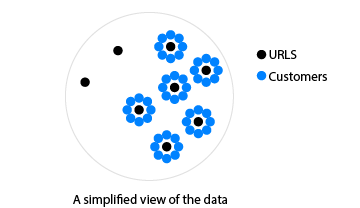

In [18]:
Image('ms-data.png')

In [35]:
%%writefile mostFrequentVisitors.py
#!/usr/bin/env python
#START STUDENT CODE44
from mrjob.job import MRJob
from mrjob.step import MRStep
from mrjob.protocol import RawValueProtocol
import re    
import operator
 
class mostFrequentVisitors(MRJob):
    
    OUTPUT_PROTOCOL = RawValueProtocol
    
    URLs = {}

    def steps(self):
        return [MRStep(
                mapper = self.mapper,
                combiner = self.combiner,
                reducer_init = self.reducer_init,
                reducer = self.reducer
                )]
    
    def mapper(self, _, line):
        data = re.split(",",line)
        pageID = data[1]
        custID = data[4]
        yield pageID,{custID:1}
        
    def combiner(self,pageID,visits):
        allVisits = {}
        for visit in visits:
            for custID in visit.keys():
                allVisits.setdefault(custID,0)
                allVisits[custID] += visit[custID]
        yield pageID,allVisits
        
    def reducer_init(self):
        with open("anonymous-msweb-URLS.data", "r") as IF:
            for line in IF:
                line = line.strip()
                data = re.split(",",line)
                URL = data[4]
                pageID = data[1]
                self.URLs[pageID] = URL

    def reducer(self,pageID,visits):
        allVisits = {}
        for visit in visits:
            for custID in visit.keys():
                allVisits.setdefault(custID,0)
                allVisits[custID] += visit[custID]
        custID = max(allVisits.iteritems(), key=operator.itemgetter(1))[0]
        yield None,self.URLs[pageID]+","+pageID+","+custID+","+str(allVisits[custID])
        
if __name__ == '__main__':
    mostFrequentVisitors.run()
#END STUDENT CODE44

Overwriting mostFrequentVisitors.py


In [36]:
!chmod +x mostFrequentVisitors.py

In [37]:
!./mostFrequentVisitors.py anonymous-msweb-preprocessed.data --file anonymous-msweb-URLS.data > mostFrequentVisitors.txt

Using configs in /etc/mrjob.conf
Creating temp directory /var/folders/2f/rb8qqgd55bl77zgchyxsfl7h0000gp/T/mostFrequentVisitors.koza.20170217.211054.864882
Running step 1 of 1...
Streaming final output from /var/folders/2f/rb8qqgd55bl77zgchyxsfl7h0000gp/T/mostFrequentVisitors.koza.20170217.211054.864882/output...
Removing temp directory /var/folders/2f/rb8qqgd55bl77zgchyxsfl7h0000gp/T/mostFrequentVisitors.koza.20170217.211054.864882...


In [38]:
!head -25 mostFrequentVisitors.txt

"/regwiz",1000,36585,1
"/support",1001,23995,1
"/athome",1002,35235,1
"/kb",1003,22469,1
"/search",1004,35540,1
"/norge",1005,10004,1
"/misc",1006,27495,1
"/ie_intl",1007,19492,1
"/msdownload",1008,35236,1
"/windows",1009,23995,1
"/vbasic",1010,20915,1
"/officedev",1011,40152,1
"/outlookdev",1012,37811,1
"/vbasicsupport",1013,32727,1
"/officefreestuff",1014,20914,1
"/msexcel",1015,16662,1
"/excel",1016,33755,1
"/products",1017,37091,1
"/isapi",1018,35237,1
"/mspowerpoint",1019,16765,1
"/msdn",1020,39325,1
"/visualc",1021,35234,1
"/truetype",1022,15906,1
"/spain",1023,16079,1
"/iis",1024,20447,1


## HW4.5  <a name="1.5"></a> Clustering Tweet Dataset

[Back to Table of Contents](#TOC)

Here you will use a different dataset consisting of word-frequency distributions 
for 1,000 Twitter users. These Twitter users use language in very different ways,
and were classified by hand according to the criteria:

0: Human, where only basic human-human communication is observed.

1: Cyborg, where language is primarily borrowed from other sources
(e.g., jobs listings, classifieds postings, advertisements, etc...).

2: Robot, where language is formulaically derived from unrelated sources
(e.g., weather/seismology, police/fire event logs, etc...).

3: Spammer, where language is replicated to high multiplicity
(e.g., celebrity obsessions, personal promotion, etc... )

Check out the preprints of  recent research,
which spawned this dataset:

* http://arxiv.org/abs/1505.04342
* http://arxiv.org/abs/1508.01843

The main data lie in the accompanying file:

* [topUsers_Apr-Jul_2014_1000-words.txt](https://www.dropbox.com/s/6129k2urvbvobkr/topUsers_Apr-Jul_2014_1000-words.txt?dl=0)

and are of the form:

USERID,CODE,TOTAL,WORD1_COUNT,WORD2_COUNT,...
.
.

where

USERID = unique user identifier
CODE = 0/1/2/3 class code
TOTAL = sum of the word counts

Using this data, you will implement a 1000-dimensional K-means algorithm in MrJob on the users
by their 1000-dimensional word stripes/vectors using several 
centroid initializations and values of K.

Note that each "point" is a user as represented by 1000 words, and that
word-frequency distributions are generally heavy-tailed power-laws
(often called Zipf distributions), and are very rare in the larger class
of discrete, random distributions. For each user you will have to normalize
by its "TOTAL" column. __Try several parameterizations and initializations__ :

* (A) K=4 uniform random centroid-distributions over the 1000 words (generate 1000 random numbers and normalize the vectors)
* (B) K=2 perturbation-centroids, randomly perturbed from the aggregated (user-wide) distribution 
* (C) K=4 perturbation-centroids, randomly perturbed from the aggregated (user-wide) distribution 
* (D) K=4 "trained" centroids, determined by the sums across the classes. Use use the 
(row-normalized) class-level aggregates as 'trained' starting centroids (i.e., the training is already done for you!).
Note that you do not have to compute the aggregated distribution or the 
class-aggregated distributions, which are rows in the auxiliary file:


* [topUsers_Apr-Jul_2014_1000-words_summaries.txt](https://www.dropbox.com/s/w4oklbsoqefou3b/topUsers_Apr-Jul_2014_1000-words_summaries.txt?dl=0)

Row 1: Words
Row 2: Aggregated distribution across all classes
Row 3-6 class-aggregated distributions for clases 0-3
For (A),  we select 4 users randomly from a uniform distribution [1,...,1,000]
For (B), (C), and (D)  you will have to use data from the auxiliary file: 

* [topUsers_Apr-Jul_2014_1000-words_summaries.txt](https://www.dropbox.com/s/w4oklbsoqefou3b/topUsers_Apr-Jul_2014_1000-words_summaries.txt?dl=0)

This file contains 5 special word-frequency distributions:

* (1) The 1000-user-wide aggregate, which you will perturb for initializations
in parts (B) and (C), and
* (2-5) The 4 class-level aggregates for each of the user-type classes (0/1/2/3)


In parts (B) and (C), you will have to perturb the 1000-user aggregate 
(after initially normalizing by its sum, which is also provided).
So if in (B) you want to create 2 perturbations of the aggregate, start
with (1), normalize, and generate 1000 random numbers uniformly 
from the unit interval (0,1) twice (for two centroids), using:

In [39]:
from numpy import random
numbers = random.sample(1000)

Take these 1000 numbers and add them (component-wise) to the 1000-user aggregate,
and then renormalize to obtain one of your aggregate-perturbed initial centroids.

In [40]:
###################################################################################
##Geneate random initial centroids around the global aggregate
##Part (B) and (C) of this question
###################################################################################
def startCentroidsBC(k):
    counter = 0
    for line in open("topUsers_Apr-Jul_2014_1000-words_summaries.txt").readlines():
        if counter == 2:        
            data = re.split(",",line)
            globalAggregate = [float(data[i+3])/float(data[2]) for i in range(1000)]
        counter += 1
    #perturb the global aggregate for the four initializations    
    centroids = []
    for i in range(k):
        rndpoints = random.sample(1000)
        peturpoints = [rndpoints[n]/10+globalAggregate[n] for n in range(1000)]
        centroids.append(peturpoints)
        total = 0
        for j in range(len(centroids[i])):
            total += centroids[i][j]
        for j in range(len(centroids[i])):
            centroids[i][j] = centroids[i][j]/total
    return centroids

For experiments A, B, C and D and iterate until a threshold (try 0.001) is reached.
After convergence, print out a summary of the classes present in each cluster.
In particular, report the composition as measured by the total
portion of each class type (0-3) contained in each cluster,
and discuss your findings and any differences in outcomes across parts A-D.

<h2>K-Means</h2>
K-means is a clustering method that aims to find the positions μi,i=1...k of the clusters that minimize the distance from the data points to the cluster. K-means clustering solves:
<br><br>
$$\arg\min_{c} \sum_{i=1}^k\sum_{{x}\in c_i} d({x},\mu_i) = \arg\min_{c} \sum_{i=1}^k\sum_{{x}\in c_i} \left\Vert {x}-\mu_i \right\Vert_2^2$$
<br><br>
where ${c}_i$ is the set of points that belong to cluster i. The K-means clustering uses the square of the Euclidean distance $d({x},\mu_i) = \left\Vert {x}-\mu_i \right\Vert_2^2$. This problem is not trivial (in fact it is NP-hard), so the K-means algorithm only hopes to find the global minimum, possibly getting stuck in a different solution.

<h2>K-means algorithm</h2>

The Lloyd's algorithm, mostly known as k-means algorithm, is used to solve the k-means clustering problem and works as follows. First, decide the number of clusters k. Then:

<table>
<tbody><tr><td>1. Initialize the center of the clusters</td>
<td>${\mu}_i = $ some value $, i=1,...,k$</td>
</tr>
<tr>
<td>2. Attribute the closest cluster to each data point</td>
<td>${c}_i = \{j: d({x}_j, \mu_i) \le d({x}_j, \mu_l),  l \ne i, j=1,...,n\}$ </td>
</tr>
<tr>
<td>3. Set the position of each cluster to the mean of all data points belonging to that cluster</td>
<td>$\mu_i = \frac{1}{|c_i|}\sum_{j\in c_i} {x}_j,\forall i$</td>
</tr>
<tr><td>4. Repeat steps 2-3 until convergence</td>
<td></td>
</tr>
<tr><td>Notation</td><td>${|c|} = $ number of elements in  ${c}$</td>
</tr>
</tbody>
</table>

<h2>Calculating purity</h2>
![purity illustration](http://www.candpgeneration.com/images/purity.png)

In [54]:
%%writefile Kmeans.py
#!/usr/bin/env python
#START STUDENT CODE45

from mrjob.job import MRJob
from mrjob.step import MRStep
import re    
 
class Kmeans(MRJob):

    def steps(self):
        return [MRStep(
                mapper_init = self.mapper_init,
                mapper = self.mapper,
                combiner = self.combiner,
                reducer = self.reducer
                )]
    
    ## mapper_init is responsible for reading in the centroids.
    def mapper_init(self):
        self.centroid_points = [map(float,s.split('\n')[0].split(',')) for s in open("centroids.txt").readlines()]
    
    ## mapper is responsible for finding the centroid 
    ## that is closest to the user (line), and then
    ## passing along the closest centroid's idx with the user vector as:
    ## (k,v) = (idx,[users,1,vector])
    ## where 'users' initially is a singleton vector, [ID]
    
    def mapper(self, _, datstr):
        total = 0
        data = re.split(',',datstr)
        ID = data[0]
        code = int(data[1])
        users = [ID]
        codes = [0,0,0,0]
        codes[code] = 1
        coords = [float(data[i+3])/float(data[2]) for i in range(1000)]
        for coord in coords:
            total += coord

        minDist = 0
        IDX = -1
        for idx in range(len(self.centroid_points)):
            centroid = self.centroid_points[idx]
            dist = 0
            for ix in range(len(coords)):
                dist += (centroid[ix]-coords[ix])**2
            dist = dist ** 0.5
            if minDist:
                if dist < minDist:                    
                    minDist = dist
                    IDX = idx
            else:
                minDist = dist
                IDX = idx
        yield (IDX,[users,1,coords,codes])
    
    ## combiner takes the mapper output and aggregates (sum) by idx-key
    def combiner(self,IDX,data):
        N = 0
        sumCoords = [0*num for num in range(1000)]
        sumCodes = [0,0,0,0]
        users = []
        for line in data:
            users.extend(line[0])
            N += line[1]
            coords = line[2]
            codes = line[3]
            sumCoords = [sumCoords[i]+coords[i] for i in range(len(sumCoords))]
            sumCodes = [sumCodes[i]+codes[i] for i in range(len(sumCodes))]
        yield (IDX,[users,N,sumCoords,sumCodes])

    ## reducer finishes aggregating all mapper outputs
    ## and then takes the means by idx-key. 
    def reducer(self,IDX,data):
        N = 0
        sumCoords = [0*num for num in range(1000)]
        sumCodes = [0,0,0,0]        
        users = []
        for line in data:
            users.extend(line[0])
            N += line[1]
            coords = line[2]
            codes = line[3]
            sumCoords = [sumCoords[i]+coords[i] for i in range(len(sumCoords))]
            sumCodes = [sumCodes[i]+codes[i] for i in range(len(sumCodes))]
        centroid = [sumCoords[i]/N for i in range(len(sumCoords))]
        yield (IDX,[users,N,centroid,sumCodes])

if __name__ == '__main__':
    Kmeans.run()


#END STUDENT CODE45

Writing Kmeans.py


In [68]:
#!head topUsers_Apr-Jul_2014_1000-words_summaries.txt

In [69]:
%%writefile Kmeans_runner.py
#!/usr/bin/env python
#START STUDENT CODE45_RUNNER
from numpy import random
from Kmeans import Kmeans
import re,sys
mr_job = Kmeans(args=["topUsers_Apr-Jul_2014_1000-words.txt","--file","centroids.txt"])

thresh = 0.0001

scriptName,part = sys.argv

## only stop when distance is below thresh for all centroids
def stopSignal(k,thresh,newCentroids,oldCentroids):
    stop = 1
    for i in range(k):
        dist = 0
        for j in range(len(newCentroids[i])): 
            dist += (newCentroids[i][j] - oldCentroids[i][j]) ** 2
        dist = dist ** 0.5
        if (dist > thresh):
            stop  = 0
            break
    return stop

##################################################################################
# Use four centroids from the coding
##################################################################################
def startCentroidsA():
    k = 4
    centroids = []
    for i in range(k):
        rndpoints = random.sample(1000)
        total = sum(rndpoints)
        centroid = [pt/total for pt in rndpoints]
        centroids.append(centroid)
    return centroids
###################################################################################

###################################################################################
## Geneate random initial centroids around the global aggregate
###################################################################################
def startCentroidsBC(k):
    counter = 0
    for line in open("topUsers_Apr-Jul_2014_1000-words_summaries.txt").readlines():
        if counter == 2:        
            data = re.split(",",line)
            globalAggregate = [float(data[i+3])/float(data[2]) for i in range(1000)]
        counter += 1
    ## perturb the global aggregate for the four initializations    
    centroids = []
    for i in range(k):
        rndpoints = random.sample(1000)
        peturpoints = [rndpoints[n]/10+globalAggregate[n] for n in range(1000)]
        centroids.append(peturpoints)
        total = 0
        for j in range(len(centroids[i])):
            total += centroids[i][j]
        for j in range(len(centroids[i])):
            centroids[i][j] = centroids[i][j]/total
    return centroids
###################################################################################

##################################################################################
# Use four centroids from the coding
##################################################################################
def startCentroidsD():
    k = 4
    centroids = []
    counter = 0
    for line in open("topUsers_Apr-Jul_2014_1000-words_summaries.txt").readlines():
        if counter and counter > 1:        
            data = re.split(",",line)
            coords = [float(data[i+3])/float(data[2]) for i in range(1000)]
            centroids.append(coords)
        counter += 1
    return centroids
###################################################################################

if part == "A":
    k = 4
    centroids = startCentroidsA()
if part == "B":
    k = 2
    centroids = startCentroidsBC(k)
if part == "C":
    k = 4
    centroids = startCentroidsBC(k)
if part == "D":
    k = 4
    centroids = startCentroidsD()

## the totals for each user type
numType = [752,91,54,103]
numType = [float(numType[i]) for i in range(4)]

with open("centroids.txt", 'w+') as f:
    for centroid in centroids:
        centroid = [str(coord) for coord in centroid]
        f.writelines(",".join(centroid) + "\n")

iterate = 0
stop = 0

clusters = ["NA" for i in range(k)]
N = ["NA" for i in range(k)]
while(not stop):
    with mr_job.make_runner() as runner:
        runner.run()
        oldCentroids = centroids[:]
        clusterPurities = []
        for line in runner.stream_output():
            key,value =  mr_job.parse_output_line(line)
            clusters[key] = value[0]
            N[key] = value[1]
            centroids[key] = value[2]
            sumCodes = value[3]
            clusterPurities.append(float(max(sumCodes))/float(sum(sumCodes)))
        ## update the centroids
        with open("centroids.txt", 'w+') as f:
            for centroid in centroids:
                centroid = [str(coord) for coord in centroid]
                f.writelines(",".join(centroid) + "\n")
        
        print str(iterate+1)+","+",".join(str(purity) for purity in clusterPurities)
        stop = stopSignal(k,thresh,centroids,oldCentroids)
        if not iterate:
            stop = 0
    iterate += 1


#END STUDENT CODE45_RUNNER

Overwriting Kmeans_runner.py


In [70]:
!chmod +x Kmeans.py Kmeans_runner.py

In [71]:
!./Kmeans_runner.py A > purities-A.txt

!./Kmeans_runner.py B > purities-B.txt

!./Kmeans_runner.py C > purities-C.txt

!./Kmeans_runner.py D > purities-D.txt

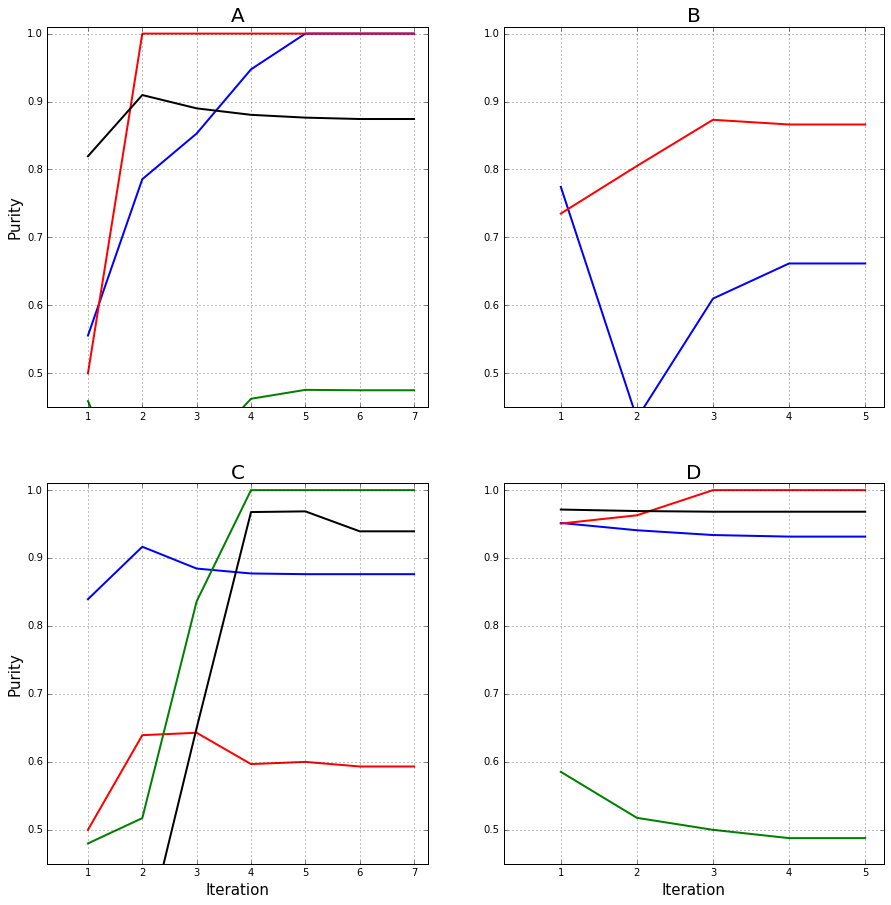

In [77]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import re


k = 4
plt.figure(figsize=(15, 15))
iterations = []
## function loads data from any of the 4 initializations
def loadData(filename):
    purities = {}
    f = open(filename, 'r')
    for line in f:
        line  = line.strip()
        data = re.split(",",line)
        iterations.append(int(data[0]))
        i = 0
        for i in range(len(data)):
            if i:
                purities.setdefault(i,[])
                purities[i].append(float(data[i])) 
    return purities

## load purities for initialization A
purities = {}
purities = loadData("purities-A.txt")
iterations = [i+1 for i in range(len(purities[1]))]

## plot purities for initialization A
plot.subplot(2,2,1)
plot.axis([0.25, max(iterations)+0.25,0.45, 1.01])
plot.plot(iterations,purities[1],'b',lw=2)
plot.plot(iterations,purities[2],'r',lw=2)
plot.plot(iterations,purities[3],'g',lw=2)
plot.plot(iterations,purities[4],'black',lw=2)
plot.ylabel('Purity',fontsize=15)
plot.title("A",fontsize=20)
plot.grid(True)

## load purities for initialization A
purities = {}
purities = loadData("purities-B.txt")
iterations = [i+1 for i in range(len(purities[1]))]

## plot purities for initialization B
plot.subplot(2,2,2)
plot.axis([0.25, max(iterations)+0.25,0.45, 1.01])
plot.plot(iterations,purities[1],'b',lw=2)
plot.plot(iterations,purities[2],'r',lw=2)
plot.title("B",fontsize=20)
plot.grid(True)

## load purities for initialization C
purities = {}
purities = loadData("purities-C.txt")
iterations = [i+1 for i in range(len(purities[1]))]

## plot purities for initialization C
plot.subplot(2,2,3)
plot.axis([0.25, max(iterations)+0.25,0.45, 1.01])
plot.plot(iterations,purities[1],'b',lw=2)
plot.plot(iterations,purities[2],'r',lw=2)
plot.plot(iterations,purities[3],'g',lw=2)
plot.plot(iterations,purities[4],'black',lw=2)
plot.xlabel('Iteration',fontsize=15)
plot.ylabel('Purity',fontsize=15)
plot.title("C",fontsize=20)
plot.grid(True)

## load purities for initialization D
purities = {}
purities = loadData("purities-D.txt")
iterations = [i+1 for i in range(len(purities[1]))]

## plot purities for initialization D
plot.subplot(2,2,4)
plot.axis([0.25, max(iterations)+0.25,0.45, 1.01])
plot.plot(iterations,purities[1],'b',lw=2)
plot.plot(iterations,purities[2],'r',lw=2)
plot.plot(iterations,purities[3],'g',lw=2)
plot.plot(iterations,purities[4],'black',lw=2)
plot.xlabel('Iteration',fontsize=15)
plot.title("D",fontsize=20)
plot.grid(True)

### Discussion
As a general note, our comparison of initializations must be 'taken with a grain of salt,' 
as A,B, and C all incorporate some randomization into initialization, 
leading to results that will vary from run to run.
If we wished to compare the randomization initializations with greater confidence,
it would be best to run our experiment a number of times, 
recording purities at convergence, the numbers of iterations before convergence, etc., 
and summarizing these results across runs.

The above being said, in the printout above we can see across those runs with k=4 (A,B, and D), 
that the 'trained' centroid initializations (D) succeeded in converging in the fewest iterations.
In addition, we can see that when D is compared to all other initializations,
the top three (most pure) clusters are generally purer (>90%) after convergence,
indicating that the labeling of users accompanying the data are likely meaningful.
Of all of the initializations, we can see that B performs the worst with regard to 
cluster purity. However, this not exactly a fair comparison, as the purities of 2 clusters
with 4 labels will necessarily be low---it is not possible to isolate all user types!
However, if we wished to see the value of this initialization 
in the context of the dataset, we could take note of whether 
the two most human classes (0 and 3) are clustered together, 
and separate from the two most automated classes (1 and 2),
which is likely the case, but would require keeping track of the
number of each user type present in each cluster (at convergence).

Looking closer at D, we can see that one of the clusters is very non-pure, 
indicating that some users were discordant with respect to their classes, 
forming a mixed cluster in terms of word-frequency.
However, we must be careful not to mislead ourselves while interpreting these results,
as we do not know which user class dominates each cluster. Noting that approximately
75% of all users are labeled as human, it is possible for all clusters to be dominated
by the human class. This however, is not the case, and could be made clear through further analysis,
plotting the numbers of each type present in each cluster at convergence
(which would also inform us of the fact that the least pure cluster is a split of 
robots and cyborgs, who can actually be quite similar!).

## HW4.6  <a name="1.6"></a> (OPTIONAL) Scaleable K-MEANS++ 

[Back to Table of Contents](#TOC)

Over half a century old and showing no signs of aging,
k-means remains one of the most popular data processing
algorithms. As is well-known, a proper initialization
of k-means is crucial for obtaining a good final solution.
The recently proposed k-means++ initialization algorithm
achieves this, obtaining an initial set of centers that is provably
close to the optimum solution. A major downside of the
k-means++ is its inherent sequential nature, which limits its
applicability to massive data: one must make k passes over
the data to find a good initial set of centers. The paper listed below 
shows how to drastically reduce the number of passes needed
to obtain, in parallel, a good initialization. This is unlike
prevailing efforts on parallelizing k-means that have mostly
focused on the post-initialization phases of k-means. The 
proposed initialization algorithm k-means||
obtains a nearly optimal solution after a logarithmic number
of passes; the paper also shows that in practice a constant
number of passes suffices. Experimental evaluation on realworld
large-scale data demonstrates that k-means|| outperforms
k-means++ in both sequential and parallel settings.

Read the following paper entitled "Scaleable K-MEANS++" located at:

http://theory.stanford.edu/~sergei/papers/vldb12-kmpar.pdf 

In MrJob, implement K-MEANS|| and compare with a random initializtion when used in 
conjunction with the kmeans algorithm as an initialization step for the 2D  dataset 
generated using code in the following notebook:

https://www.dropbox.com/s/lbzwmyv0d8rocfq/MrJobKmeans.ipynb?dl=0

Plot the initialation centroids and the centroid trajectory as the K-MEANS|| algorithms iterates. 
Repeat this for a random initalization (i.e., pick a training vector at random for each inital centroid)
of the kmeans algorithm. Comment on the trajectories of both algorithms.
Report on the number passes over the training data, and time required to run both  clustering algorithms.
Also report the rand index score for both algorithms and comment on your findings.

## 4.6.1 (OPTIONAL) Apply K-MEANS||

[Back to Table of Contents](#TOC)

Apply your implementation of K-MEANS|| to the dataset  in HW 4.5 and compare to the a random initalization (i.e., pick a training vector at random for each inital centroid)of the kmeans algorithm.
Report on the number passes over the training data, and time required to run all  clustering algorithms. 
Also report the rand index score for both algorithms and comment on your findings.

## HW4.7  <a name="1.7"></a> (OPTIONAL) Canopy Clustering

[Back to Table of Contents](#TOC)

An alternative way to intialize the k-means algorithm is the  canopy clustering. The canopy clustering 
algorithm is an unsupervised pre-clustering algorithm introduced by Andrew McCallum, Kamal Nigam and 
Lyle Ungar in 2000. It is often used as preprocessing step for the K-means algorithm or the 
Hierarchical clustering algorithm. It is intended to speed up clustering operations on large data sets, 
where using another algorithm directly may be impractical due to the size of the data set.

For more details on the Canopy Clustering algorithm see:

https://en.wikipedia.org/wiki/Canopy_clustering_algorithm

Plot the initialation centroids and the centroid trajectory as the Canopy Clustering based K-MEANS algorithm iterates. 
Repeat this for a random initalization (i.e., pick a training vector at random for each inital centroid)
of the kmeans algorithm. Comment on the trajectories of both algorithms.
Report on the number passes over the training data, and time required to run both  clustering algorithms.
Also report the rand index score for both algorithms and comment on your findings.

## 4.7.1 Apply Canopy Clustering based K-MEANS

[Back to Table of Contents](#TOC)

Apply your implementation Canopy Clustering based K-MEANS algorithm to the dataset  in HW 4.5 and compare to the a 
random initalization (i.e., pick a training vector at random for each inital centroid)of the kmeans algorithm.
Report on the number passes over the training data, and time required to run both  clustering algorithms. 
Also report the rand index score for both algorithms and comment on your findings.

[Back to Table of Contents](#TOC)
<center><div class='jumbotron'><h2 style='color:green'>-------  END OF HOWEWORK --------</h2></div></center>